https://www.kaggle.com/datasets/crailtap/taxi-trajectory

In [1]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

executor = ThreadPoolExecutor(max_workers=24)

In [2]:
df_original = pd.read_csv("train.csv").sort_values(by=["TIMESTAMP"])

In [3]:
df = df_original.copy()

df.drop_duplicates(inplace=True)

df = df[~df.MISSING_DATA]

daEscludere = ["ORIGIN_CALL", "ORIGIN_STAND", "TRIP_ID", "MISSING_DATA", "TAXI_ID", "CALL_TYPE", "DAY_TYPE"]

df["tid"] = df["TRIP_ID"]

df = df[[x for x in df.columns if x not in daEscludere]]

df

,TIMESTAMP,POLYLINE,tid
577,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",1372636853620000380
3,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",1372636854620000520
0,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",1372636858620000589
10,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",1372636875620000233
64,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",1372636896620000360
...,...,...,...
1710412,1404172716,"[[-8.599248,41.149197],[-8.598645,41.148504],[...",1404172716620000359
1710511,1404172718,"[[-8.601192,41.181741],[-8.601201,41.181741],[...",1404172718620000066
1710603,1404172736,"[[-8.58609,41.175504],[-8.586351,41.174955],[-...",1404172736620000483
1710532,1404172754,"[[-8.604765,41.16123],[-8.604792,41.161167]]",1404172754620000518


In [4]:
#df = df[(df.TIMESTAMP >= 1372636853) & (df.TIMESTAMP <= (1372636853 +60*60*24*30*3))]

df

,TIMESTAMP,POLYLINE,tid
577,1372636853,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",1372636853620000380
3,1372636854,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",1372636854620000520
0,1372636858,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",1372636858620000589
10,1372636875,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",1372636875620000233
64,1372636896,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",1372636896620000360
...,...,...,...
1710412,1404172716,"[[-8.599248,41.149197],[-8.598645,41.148504],[...",1404172716620000359
1710511,1404172718,"[[-8.601192,41.181741],[-8.601201,41.181741],[...",1404172718620000066
1710603,1404172736,"[[-8.58609,41.175504],[-8.586351,41.174955],[-...",1404172736620000483
1710532,1404172754,"[[-8.604765,41.16123],[-8.604792,41.161167]]",1404172754620000518


In [5]:
import datetime

df["day_of_week"] = [datetime.datetime.fromtimestamp(x).weekday() for x in df.TIMESTAMP]

In [6]:
from tqdm import tqdm

convertedPOLYLINE =[]
for polyline in tqdm(df.POLYLINE.values):
    if(len(polyline) == 2): #lista vuota
        convertedPOLYLINE.append([])
        continue

    splittedString = polyline[1:-1].split(",")
    polyline_list = []
    for i in range(0, len(splittedString), 2):
        polyline_list.append((float(splittedString[i][1:]), float(splittedString[i+1][:-1])))
    convertedPOLYLINE.append(polyline_list)

100%|██████████| 1710657/1710657 [01:25<00:00, 20016.57it/s]


In [7]:
df.POLYLINE = convertedPOLYLINE

In [8]:
df["POLYLINE_LEN"] = [len(x) for x in df.POLYLINE]

In [9]:
df

,TIMESTAMP,POLYLINE,tid,day_of_week,POLYLINE_LEN
577,1372636853,"[(-8.610291, 41.140746), (-8.6103, 41.140755),...",1372636853620000380,0,25
3,1372636854,"[(-8.574678, 41.151951), (-8.574705, 41.151942...",1372636854620000520,0,43
0,1372636858,"[(-8.618643, 41.141412), (-8.618499, 41.141376...",1372636858620000589,0,23
10,1372636875,"[(-8.619894, 41.148009), (-8.620164, 41.14773)...",1372636875620000233,0,22
64,1372636896,"[(-8.617599, 41.146137), (-8.617581, 41.14593)...",1372636896620000360,0,43
...,...,...,...,...,...
1710412,1404172716,"[(-8.599248, 41.149197), (-8.598645, 41.148504...",1404172716620000359,1,4
1710511,1404172718,"[(-8.601192, 41.181741), (-8.601201, 41.181741...",1404172718620000066,1,4
1710603,1404172736,"[(-8.58609, 41.175504), (-8.586351, 41.174955)...",1404172736620000483,1,4
1710532,1404172754,"[(-8.604765, 41.16123), (-8.604792, 41.161167)]",1404172754620000518,1,2


<AxesSubplot:>

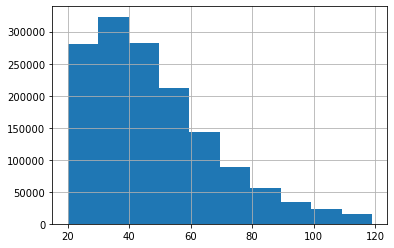

In [10]:
#i dati hanno sono raccolti ogni 15s, prendo le traiettorie lunghe almeno 5 minuti (20 punti) e al più 30 minuti

df[(df.POLYLINE_LEN >= (5*60)/15) & (df.POLYLINE_LEN < (30*60)/15)].POLYLINE_LEN.hist()

In [11]:
df = df[(df.POLYLINE_LEN >= (5*60)/15) & (df.POLYLINE_LEN < (30*60)/15)].sort_values(by=["tid", "TIMESTAMP"])


In [12]:
df

,TIMESTAMP,POLYLINE,tid,day_of_week,POLYLINE_LEN
577,1372636853,"[(-8.610291, 41.140746), (-8.6103, 41.140755),...",1372636853620000380,0,25
3,1372636854,"[(-8.574678, 41.151951), (-8.574705, 41.151942...",1372636854620000520,0,43
0,1372636858,"[(-8.618643, 41.141412), (-8.618499, 41.141376...",1372636858620000589,0,23
10,1372636875,"[(-8.619894, 41.148009), (-8.620164, 41.14773)...",1372636875620000233,0,22
64,1372636896,"[(-8.617599, 41.146137), (-8.617581, 41.14593)...",1372636896620000360,0,43
...,...,...,...,...,...
1710358,1404172208,"[(-8.591247, 41.18139), (-8.591265, 41.181381)...",1404172208620000196,1,38
1710480,1404172241,"[(-8.617662, 41.146083), (-8.617626, 41.145984...",1404172241620000675,1,30
1710286,1404172319,"[(-8.613918, 41.146407), (-8.613819, 41.147163...",1404172319620000571,1,30
1710288,1404172369,"[(-8.617734, 41.146056), (-8.617572, 41.145498...",1404172369620000171,1,24


In [13]:
def espandiPolyline(df_oneRow, colToExpand):
    row = df_oneRow.values
    if len(row) != 1:
        raise Exception("df di più di 1 riga")
    row = row[0]
    df = pd.DataFrame(columns=[x for x in df_oneRow.columns if x != colToExpand] + ["lat", "lon", "timestamp_offset"])

    t_lat_lon = [[], [], []]
    for t_offset, (lat, lon) in enumerate(row[list(df_oneRow.columns).index(colToExpand)]):
        t_lat_lon[0].append(t_offset)
        t_lat_lon[1].append(lat)
        t_lat_lon[2].append(lon)

    df.timestamp_offset = t_lat_lon[0]
    df.lat = t_lat_lon[1]
    df.lon = t_lat_lon[2]

    for i, colName in enumerate(df_oneRow):
        if colName == colToExpand:
            continue
        df[colName] = row[i]

    return df


In [14]:
espandiPolyline(df[df.tid == 1372636853620000380], "POLYLINE")

,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon,timestamp_offset
0,1372636853,1372636853620000380,0,25,-8.610291,41.140746,0
1,1372636853,1372636853620000380,0,25,-8.610300,41.140755,1
2,1372636853,1372636853620000380,0,25,-8.610309,41.140890,2
3,1372636853,1372636853620000380,0,25,-8.613657,41.141358,3
4,1372636853,1372636853620000380,0,25,-8.614602,41.141484,4
5,1372636853,1372636853620000380,0,25,-8.614242,41.142618,5
6,1372636853,1372636853620000380,0,25,-8.613630,41.143239,6
7,1372636853,1372636853620000380,0,25,-8.612883,41.143761,7
8,1372636853,1372636853620000380,0,25,-8.612208,41.144238,8
9,1372636853,1372636853620000380,0,25,-8.611542,41.144724,9


In [15]:
df

,TIMESTAMP,POLYLINE,tid,day_of_week,POLYLINE_LEN
577,1372636853,"[(-8.610291, 41.140746), (-8.6103, 41.140755),...",1372636853620000380,0,25
3,1372636854,"[(-8.574678, 41.151951), (-8.574705, 41.151942...",1372636854620000520,0,43
0,1372636858,"[(-8.618643, 41.141412), (-8.618499, 41.141376...",1372636858620000589,0,23
10,1372636875,"[(-8.619894, 41.148009), (-8.620164, 41.14773)...",1372636875620000233,0,22
64,1372636896,"[(-8.617599, 41.146137), (-8.617581, 41.14593)...",1372636896620000360,0,43
...,...,...,...,...,...
1710358,1404172208,"[(-8.591247, 41.18139), (-8.591265, 41.181381)...",1404172208620000196,1,38
1710480,1404172241,"[(-8.617662, 41.146083), (-8.617626, 41.145984...",1404172241620000675,1,30
1710286,1404172319,"[(-8.613918, 41.146407), (-8.613819, 41.147163...",1404172319620000571,1,30
1710288,1404172369,"[(-8.617734, 41.146056), (-8.617572, 41.145498...",1404172369620000171,1,24


In [16]:
executor = ThreadPoolExecutor(max_workers=1000)

threads = []
for df_tid in tqdm([pd.DataFrame(df.iloc[i]).T for i in tqdm(range(len(df)))]):
    threads.append(executor.submit(espandiPolyline, df_tid, "POLYLINE"))

df_normalizzati = [x.result() for x in threads]

100%|██████████| 1459211/1459211 [55:28<00:00, 438.40it/s]   


In [17]:
df = pd.concat(df_normalizzati)

In [18]:
df.TIMESTAMP = df.TIMESTAMP + df.timestamp_offset*15

df

,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon,timestamp_offset
0,1372636853,1372636853620000380,0,25,-8.610291,41.140746,0
1,1372636868,1372636853620000380,0,25,-8.610300,41.140755,1
2,1372636883,1372636853620000380,0,25,-8.610309,41.140890,2
3,1372636898,1372636853620000380,0,25,-8.613657,41.141358,3
4,1372636913,1372636853620000380,0,25,-8.614602,41.141484,4
...,...,...,...,...,...,...,...
15,1404172706,1404172481620000603,1,20,-8.654004,41.148774,15
16,1404172721,1404172481620000603,1,20,-8.655309,41.148045,16
17,1404172736,1404172481620000603,1,20,-8.657478,41.146938,17
18,1404172751,1404172481620000603,1,20,-8.659980,41.147037,18


In [19]:
df = df[[x for x in df.columns if x != "timestamp_offset"]]

In [20]:
df

,TIMESTAMP,tid,day_of_week,POLYLINE_LEN,lat,lon
0,1372636853,1372636853620000380,0,25,-8.610291,41.140746
1,1372636868,1372636853620000380,0,25,-8.610300,41.140755
2,1372636883,1372636853620000380,0,25,-8.610309,41.140890
3,1372636898,1372636853620000380,0,25,-8.613657,41.141358
4,1372636913,1372636853620000380,0,25,-8.614602,41.141484
...,...,...,...,...,...,...
15,1404172706,1404172481620000603,1,20,-8.654004,41.148774
16,1404172721,1404172481620000603,1,20,-8.655309,41.148045
17,1404172736,1404172481620000603,1,20,-8.657478,41.146938
18,1404172751,1404172481620000603,1,20,-8.659980,41.147037


In [21]:
df.to_csv("train_denorm_tutto.zip", index=None)